In [1]:
# Dependencies
import pandas as pd
import requests
import json


In [2]:
# Read application_data csv file
# Create application DataFrame

app_data = "application_data.csv"
application = pd.read_csv(app_data)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Read previous_application csv file
# Create previous DataFrame

previous_app_data = "previous_application.csv"
previous_app = pd.read_csv(previous_app_data)

In [4]:
# Create new application_data file for selected columns only

appdata = application[["SK_ID_CURR", 
                        "TARGET",
                        "NAME_CONTRACT_TYPE",
                        "CODE_GENDER",
                        "FLAG_OWN_CAR",
                        "FLAG_OWN_REALTY",
                        "CNT_CHILDREN",
                        "AMT_INCOME_TOTAL",
                        "AMT_CREDIT",
                        "AMT_ANNUITY",
                        "AMT_GOODS_PRICE",
                        "NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE",
                        "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE",
                        "REGION_POPULATION_RELATIVE",
                        "DAYS_BIRTH",
                        "OCCUPATION_TYPE",
                        "CNT_FAM_MEMBERS",
                        "REGION_RATING_CLIENT",
                        "WEEKDAY_APPR_PROCESS_START",
                        "ORGANIZATION_TYPE",
                        "OBS_30_CNT_SOCIAL_CIRCLE",
                        "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE",
                        "AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT",
                        "AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [5]:
# Rename applications data columns - before merge
# Add 'CURR' to the column heading to denote the original application_data file

clean_appdata = appdata.rename(columns={"TARGET": "CURR_TARGET",
                                        "NAME_CONTRACT_TYPE": "CURR_NAME_CONTRACT_TYPE",
                                        "CODE_GENDER": "CURR_CODE_GENDER",
                                        "FLAG_OWN_CAR": "CURR_FLAG_OWN_CAR",
                                        "FLAG_OWN_REALTY": "CURR_FLAG_OWN_REALTY",
                                        "CNT_CHILDREN": "CURR_CNT_CHILDREN",
                                        "AMT_INCOME_TOTAL": "CURR_AMT_INCOME_TOTAL",
                                        "AMT_CREDIT": "CURR_AMT_CREDIT",
                                        "AMT_ANNUITY": "CURR_AMT_ANNUITY",
                                        "AMT_GOODS_PRICE": "CURR_AMT_GOODS_PRICE",
                                        "NAME_INCOME_TYPE": "CURR_NAME_INCOME_TYPE",
                                        "NAME_EDUCATION_TYPE": "CURR_NAME_EDUCATION_TYPE",
                                        "NAME_FAMILY_STATUS": "CURR_NAME_FAMILY_STATUS",
                                        "NAME_HOUSING_TYPE": "CURR_NAME_HOUSING_TYPE",
                                        "REGION_POPULATION_RELATIVE": "CURR_REGION_POPULATION_RELATIVE",
                                        "DAYS_BIRTH": "CURR_DAYS_BIRTH",
                                        "OCCUPATION_TYPE": "CURR_OCCUPATION_TYPE",
                                        "CNT_FAM_MEMBERS": "CURR_CNT_FAM_MEMBERS",
                                        "REGION_RATING_CLIENT": "CURR_REGION_RATING_CLIENT",
                                        "WEEKDAY_APPR_PROCESS_START": "CURR_WEEKDAY_APPR_PROCESS_START",
                                        "ORGANIZATION_TYPE": "CURR_ORGANIZATION_TYPE",
                                        "OBS_30_CNT_SOCIAL_CIRCLE": "CURR_OBS_30_CNT_SOCIAL_CIRCLE",
                                        "DEF_30_CNT_SOCIAL_CIRCLE": "CURR_DEF_30_CNT_SOCIAL_CIRCLE",
                                        "OBS_60_CNT_SOCIAL_CIRCLE": "CURR_OBS_60_SOCIAL_CIRCLE",
                                        "DEF_60_CNT_SOCIAL_CIRCLE": "CURR_DEF_60_SOCIAL_CIRCLE",
                                        "AMT_REQ_CREDIT_BUREAU_MON": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_QRT": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_YEAR": "CURR_AMT_REQ_CREDIT_BUREAU_YEAR" 
                                       })

In [6]:
# Create previous_application_data file with with selected columns

prevdata = previous_app[["SK_ID_PREV",
                        "SK_ID_CURR",
                        "NAME_CONTRACT_TYPE",
                        "AMT_ANNUITY",
                        "AMT_APPLICATION",
                        "AMT_CREDIT",
                        "AMT_DOWN_PAYMENT",
                        "AMT_GOODS_PRICE",
                        "WEEKDAY_APPR_PROCESS_START",
                        "NFLAG_LAST_APPL_IN_DAY",
                        "NAME_CASH_LOAN_PURPOSE",
                        "NAME_CONTRACT_STATUS",
                        "DAYS_DECISION",
                        "CODE_REJECT_REASON",
                        "NAME_CLIENT_TYPE",
                        "NAME_GOODS_CATEGORY",
                        "NAME_PORTFOLIO",
                        "NAME_PRODUCT_TYPE",
                        "CHANNEL_TYPE",
                        "NAME_SELLER_INDUSTRY",
                        "NAME_YIELD_GROUP",
                        "PRODUCT_COMBINATION",
                        "DAYS_FIRST_DRAWING",
                        "DAYS_FIRST_DUE",
                        "DAYS_LAST_DUE_1ST_VERSION",
                        "DAYS_LAST_DUE",
                        "DAYS_TERMINATION",
                        "NFLAG_INSURED_ON_APPROVAL"]]

In [7]:
# Rename the columns for previous_application_data
# Add 'PREV' to the column heading to denote the original previous file

clean_prevdata = prevdata.rename(columns={"SK_ID_PREV": "PREV_SK_ID_PREV",
                                    "NAME_CONTRACT_TYPE": "PREV_NAME_CONTRACT_TYPE",
                                    "AMT_ANNUITY": "PREV_AMT_ANNUITY",
                                    "AMT_APPLICATION": "PREV_AMT_APPLICATION",
                                    "AMT_CREDIT": "PREV_AMT_CREDIT",
                                    "AMT_DOWN_PAYMENT": "PREV_AMT_DOWN_PAYMENT",
                                    "AMT_GOODS_PRICE": "PREV_AMT_GOODS_PRICE",
                                    "WEEKDAY_APPR_PROCESS_START": "PREV_WEEKDAY_APPR_PROCESS_START",
                                    "NFLAG_LAST_APPL_IN_DAY": "PREV_NFLAG_LAST_APPL_IN_DAY",
                                    "NAME_CASH_LOAN_PURPOSE": "PREV_NAME_CASH_LOAN_PURPOSE",
                                    "NAME_CONTRACT_STATUS": "PREV_NAME_CONTRACT_STATUS",
                                    "DAYS_DECISION": "PREV_DAYS_DECISION",
                                    "CODE_REJECT_REASON": "PREV_CODE_REJECT_REASON",
                                    "NAME_CLIENT_TYPE": "PREV_NAME_CLIENT",
                                    "NAME_GOODS_CATEGORY": "PREV_NAME_GOODS_CATEGORY",
                                    "NAME_PORTFOLIO": "PREV_NAME_PORTFOLIO",
                                    "NAME_PRODUCT_TYPE": "PREV_NAME_PRODUCT_TYPE",
                                    "CHANNEL_TYPE": "PREV_CHANNEL_TYPE",
                                    "NAME_SELLER_INDUSTRY": "PREV_NAME_SELLER_INDUSTRY",
                                    "NAME_YIELD_GROUP": "PREV_NAME_YIELD_GROUP",
                                    "PRODUCT_COMBINATION": "PREV_PRODUCT_COMBINATION",
                                    "DAYS_FIRST_DRAWING": "PREV_DAYS_FIRST_DRAWING",
                                    "DAYS_FIRST_DUE": "PREV_DAYS_FIRST_DUE",
                                    "DAYS_LAST_DUE_1ST_VERSION": "PREV_DAYS_LAST_DUE_1ST_VERSION",
                                    "DAYS_LAST_DUE": "PREV_DAYS_LAST_DUE",
                                    "DAYS_TERMINATION": "PREV_DAYS_TERMINATION",
                                    "NFLAG_INSURED_ON_APPROVAL": "PREV_NFLAG_INSURED_ON_APPROVAL"    
                                         })

In [8]:
# Create one dataframe
# Merge clean_appdata and clean_prevdata
loan_data = pd.merge(clean_appdata, clean_prevdata, on='SK_ID_CURR', how='inner')
loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [9]:
# Check Unique SK_ID_CURR

sk_id_count = loan_data["SK_ID_CURR"].nunique()
print(sk_id_count)

291057


In [10]:
# Check for duplicates on SK_ID_CURR series
loan_data.loc[loan_data[['SK_ID_CURR']].duplicated(keep='first'), :]

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Country-wide,Consumer electronics,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Country-wide,Connectivity,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [11]:
# Create a clean DataFrame by dropping the duplicates on series SK_ID_CURR. Use .drop_duplicates()

clean_loan_data = loan_data.drop_duplicates(subset=['SK_ID_CURR'])

In [12]:
clean_loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
14,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Regional / Local,Consumer electronics,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0


In [13]:
# View Column counts
# From this Column count - the series PREV_RATE_INTEREST_PRIMARY needs review. This column only has 1630 cells of data.
clean_loan_data.count()

SK_ID_CURR                         291057
CURR_TARGET                        291057
CURR_NAME_CONTRACT_TYPE            291057
CURR_CODE_GENDER                   291057
CURR_FLAG_OWN_CAR                  291057
CURR_FLAG_OWN_REALTY               291057
CURR_CNT_CHILDREN                  291057
CURR_AMT_INCOME_TOTAL              291057
CURR_AMT_CREDIT                    291057
CURR_AMT_ANNUITY                   291045
CURR_AMT_GOODS_PRICE               290790
CURR_NAME_INCOME_TYPE              291057
CURR_NAME_EDUCATION_TYPE           291057
CURR_NAME_FAMILY_STATUS            291057
CURR_NAME_HOUSING_TYPE             291057
CURR_REGION_POPULATION_RELATIVE    291057
CURR_DAYS_BIRTH                    291057
CURR_OCCUPATION_TYPE               199817
CURR_CNT_FAM_MEMBERS               291057
CURR_REGION_RATING_CLIENT          291057
CURR_WEEKDAY_APPR_PROCESS_START    291057
CURR_ORGANIZATION_TYPE             291057
CURR_OBS_30_CNT_SOCIAL_CIRCLE      290283
CURR_DEF_30_CNT_SOCIAL_CIRCLE     

In [14]:
# Calculate loan applicant age based on CURR_DAYS_BIRTH series
# Add column for AGE
clean_loan_data['CURR_DAYS_BIRTH'].astype(float)
age = clean_loan_data['CURR_DAYS_BIRTH'] / -365
clean_loan_data['AGE'] = round(clean_loan_data['CURR_DAYS_BIRTH'] / -365, 0)

C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
# Create Bins for Age
bins = [20, 31, 40, 50, 60, 70]
group_names = ["< 30", "31-40", "41-50", "51-60", "61 +"]

clean_loan_data["AGE RANGE"] = pd.cut(clean_loan_data["AGE"], bins, labels=group_names, include_lowest=True)


C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# Save file as csv
clean_loan_data.to_csv("Output/cleanloandata.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/cleanloandata.csv'

In [17]:
clean_loan_data.count()

SK_ID_CURR                         291057
CURR_TARGET                        291057
CURR_NAME_CONTRACT_TYPE            291057
CURR_CODE_GENDER                   291057
CURR_FLAG_OWN_CAR                  291057
CURR_FLAG_OWN_REALTY               291057
CURR_CNT_CHILDREN                  291057
CURR_AMT_INCOME_TOTAL              291057
CURR_AMT_CREDIT                    291057
CURR_AMT_ANNUITY                   291045
CURR_AMT_GOODS_PRICE               290790
CURR_NAME_INCOME_TYPE              291057
CURR_NAME_EDUCATION_TYPE           291057
CURR_NAME_FAMILY_STATUS            291057
CURR_NAME_HOUSING_TYPE             291057
CURR_REGION_POPULATION_RELATIVE    291057
CURR_DAYS_BIRTH                    291057
CURR_OCCUPATION_TYPE               199817
CURR_CNT_FAM_MEMBERS               291057
CURR_REGION_RATING_CLIENT          291057
CURR_WEEKDAY_APPR_PROCESS_START    291057
CURR_ORGANIZATION_TYPE             291057
CURR_OBS_30_CNT_SOCIAL_CIRCLE      290283
CURR_DEF_30_CNT_SOCIAL_CIRCLE     

In [ ]:
#summarydataframe

In [ ]:
#question1

In [ ]:
#question2


In [ ]:
#question3

In [ ]:
#question4

In [18]:
#question5
import matplotlib.pyplot as plt
import numpy as np
age_df= clean_loan_data[["SK_ID_CURR","AGE","AGE RANGE","PREV_NAME_CONTRACT_STATUS"]]
conditions = [(age_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(age_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(age_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(age_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
age_df['APPROVAL COUNT'] = np.select(conditions,values)
#approved_agesummary_df = age_df.loc[age_df["PREV_NAME_CONTRACT_STATUS"]=="Approved", :]
agesum_summary_df = age_df.groupby(['AGE RANGE'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount_summary_df = age_df.groupby(['AGE RANGE'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge_df = pd.merge(agesum_summary_df, agecount_summary_df, on="AGE RANGE")
merge_df = merge_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge_df['Rejections'] = merge_df['Applications'] - merge_df['Approvals']

merge_df['Approval Rate'] =(merge_df['Approvals']/merge_df['Applications']).astype(float)

merge_df

C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,AGE RANGE,Approvals,Applications,Rejections,Approval Rate
0,< 30,41420,53288,11868,0.777286
1,31-40,55050,70885,15835,0.776610
2,41-50,55295,71850,16555,0.769589
3,51-60,48784,64306,15522,0.758623
4,61 +,23496,30728,7232,0.764645


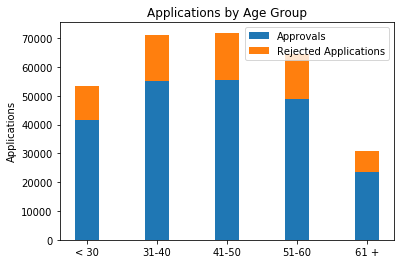

There is no direct correlation between age and approval rates. The average approval rate accross all age ranges is 77%


In [162]:
# plt.scatter(age_df["AGE"], age_df["APPROVAL COUNT"], marker="o",edgecolors='black')
# # plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
# # plt.ylabel("Cloudiness (%)")
# # plt.xlabel("Latitude")
# plt.grid(True)
# #plt.savefig("Graphics/LatvCloud.png")# plt.show()
#print("The Latitude vs. Cloudiness plot appears to share that directly avoe and below the equator there is the lowest level of cloudiness recorded.")

# N=5
# width = 0.35
# #x_axis = np.arange(len(merge_df))
# #tick_locations = merge_df['AGE RANGE']
# fig = plt.figure()
# ind = np.arange(N) # the x locations for the groups
# ax = fig.add_axes([0,0,1,1])
# ax.bar(ind, approvals, width, color='r')
# ax.bar(ind, rejections, width,bottom=approvals, color='b')
# x_axis = np.arange(len(merge_df))
# tick_locations = [value for value in x_axis]
# ax.plt.xticks(tick_locations,merge_df["AGE RANGE"], rotation="vertical")
# approvals = merge_df['Approvals']
# rejections = merge_df['Rejections']
# ax.set_ylabel('Applications')
# ax.set_title('Approval Rates by Age Group')
# #ax.set_xticks(tick_locations)
# ax.set_yticks(np.arange(0, 80000, 10000))
# ax.legend(labels=['Approvals', 'Rejections'])
# plt.show()

# x_axis = np.arange(len(merge_df))
# tick_locations = [value for value in x_axis]

# # Create a list indicating where to write x labels and set figure size to adjust for space
# approvals = merge_df['Approvals']
# rejections = merge_df['Rejections']

# plt.figure(figsize=(20,3))
# plt.bar(x_axis,approvals,rejections, color='r', alpha=0.5, align="edge")
# plt.xticks(tick_locations,merge_df["AGE RANGE"], rotation="vertical")

# # Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0,80000)

# # Set a Title and labels
# plt.title("xx")
# plt.xlabel("xxx")
# plt.ylabel("xxxx")
# plt.legend(('Approvals','Rejecions'))

# # show the grapS

# plt.show()

labels = ['< 30', '31-40', '41-50', '51-60', '61 +']
approvals = merge_df['Approvals']
rejections = merge_df['Rejections']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, approvals, width, label='Approvals')
ax.bar(labels, rejections, width, bottom=approvals,
       label='Rejected Applications')

ax.set_ylabel('Applications')
ax.set_title('Applications by Age Group')
ax.legend()

plt.show()
print("There is no direct correlation between age and approval rates. The average approval rate accross all age ranges is 77%")

In [63]:
#question6

import csv
import quandl
#from api_keys_project1 import stock_api_key


quandl.ApiConfig.api_key = 'He_gAqaLmRXFqjy82dw6'
BSE500 = quandl.get('BSE/BSE500',start_date ="2019-01-01",end_date="2019-12-31")

BSE500data= pd.concat([BSE500.head(1), BSE500.tail(1)])
BSE500data['Open'] = BSE500data['Open'].astype(int)
BSE500data['Open'].round(0)
BSE500data['High'] = BSE500data['High'].astype(int)
BSE500data['High'].round(0)
BSE500data['Low'] = BSE500data['Low'].astype(int)
BSE500data['Low'].round(0)
BSE500data['Close'] = BSE500data['Close'].astype(int)
BSE500data['Close'].round(0)

BSE500ly = quandl.get('BSE/BSE500',start_date ="2018-01-01",end_date="2018-12-31")

BSE500dataly= pd.concat([BSE500ly.head(1), BSE500ly.tail(1)])
BSE500dataly['Open'] = BSE500dataly['Open'].astype(int)
BSE500dataly['Open'].round(0)
BSE500dataly['High'] = BSE500dataly['High'].astype(int)
BSE500dataly['High'].round(0)
BSE500dataly['Low'] = BSE500dataly['Low'].astype(int)
BSE500dataly['Low'].round(0)
BSE500dataly['Close'] = BSE500dataly['Close'].astype(int)
BSE500dataly['Close'].round(0)


openpricety= BSE500data.loc["2019-01-01", "Open"]
closepricety= BSE500data.loc["2019-12-31", "Close"]
yearlypctchangety =(openprice/closeprice)-1

openpricely= BSE500dataly.loc["2018-01-01", "Open"]
closepricely= BSE500dataly.loc["2018-12-31", "Close"]
yearlypctchangely =(openpricely/closepricely)-1
print(yearlypctchangety)
print(yearlypctchangely)

-0.0010283128813326492
0.03301237964236581


In [166]:
question6_df= clean_loan_data[["SK_ID_CURR","PREV_DAYS_DECISION","PREV_NAME_CONTRACT_STATUS"]]
crit_period = (question6_df.PREV_DAYS_DECISION < -365) & (question6_df.PREV_DAYS_DECISION > -730)
question6_df = question6_df[crit_period]

conditions = [(question6_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(question6_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(question6_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(question6_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
question6_df['APPROVAL COUNT'] = np.select(conditions,values)
#approved2_agesummary_df = question6_df.loc[question6_df["PREV_NAME_CONTRACT_STATUS"]=="Approved", :]
agesum2_summary_df = question6_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount2_summary_df = question6_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge2_df = pd.merge(agesum2_summary_df, agecount2_summary_df, on="PREV_NAME_CONTRACT_STATUS")
merge2_df = merge2_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge2_df['Rejections'] = merge2_df['Applications'] - merge2_df['Approvals']

question6a_df= clean_loan_data[["SK_ID_CURR","PREV_DAYS_DECISION","PREV_NAME_CONTRACT_STATUS"]]
crit2_period = (question6a_df.PREV_DAYS_DECISION < 0) & (question6a_df.PREV_DAYS_DECISION > -365)
question7_df = question6a_df[crit2_period]

conditions = [(question7_df["PREV_NAME_CONTRACT_STATUS"] == 'Approved'),(question7_df["PREV_NAME_CONTRACT_STATUS"] == 'Canceled'),(question7_df["PREV_NAME_CONTRACT_STATUS"] =='Refused'),(question7_df["PREV_NAME_CONTRACT_STATUS"] =='Unused offer')]
values = [1,0,0,1]
question7_df['APPROVAL COUNT'] = np.select(conditions,values)
#approved2_agesummary_df = question6_df.loc[question6_df["PREV_NAME_CONTRACT_STATUS"]=="Approved", :]
agesum1_summary_df = question7_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": sum})
agecount1_summary_df = question7_df.groupby(['PREV_NAME_CONTRACT_STATUS'], as_index=False).agg({"APPROVAL COUNT": "count"})
merge1_df = pd.merge(agesum1_summary_df, agecount1_summary_df, on="PREV_NAME_CONTRACT_STATUS")
merge1_df = merge1_df.rename(columns={"APPROVAL COUNT_x":"Approvals", "APPROVAL COUNT_y":"Applications"})
merge1_df['Rejections'] = merge1_df['Applications'] - merge1_df['Approvals']

mergef_df = pd.merge(merge1_df, merge2_df, on="PREV_NAME_CONTRACT_STATUS")
mergef_df = mergef_df.rename(columns={"Approvals_x":"2019 Approvals","Rejections_x":"2019 Rejections", "Applications_x":"2019 Applications","Approvals_y":"2018 Approvals","Rejections_y":"2018 Rejections", "Applications_y":"2018 Applications"})
mergef_df['app%ty']=mergef_df['2019 Approvals']/mergef_df['2019 Applications'].sum()
mergef_df['app%ly']=mergef_df['2018 Approvals']/mergef_df['2018 Applications'].sum()
mergef_df
#approvedmergef_df = mergef_df.loc[mergef_df["PREV_NAME_CONTRACT_STATUS"]=="Approved", :]
finaltyapprate = mergef_df['app%ty'].sum()
finaltlyapprate = mergef_df['app%ty'].sum()
# lyapprate = mergef_df['2018 Approvals']/mergef_df['2018 Applications'].sum()

data = [['2018',finallyapprate,yearlypctchangely], ['2019',finaltyapprate,yearlypctchangety]] 
  
# Create the pandas DataFrame 
api_df = pd.DataFrame(data, columns = ['Year', 'Approval Rate','Market Performance']) 
api_df
# print(lyapprate)

C:\Users\Brian\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Approval Rate,Market Performance
0,2018,0.829387,0.033012
1,2019,0.519786,-0.001028


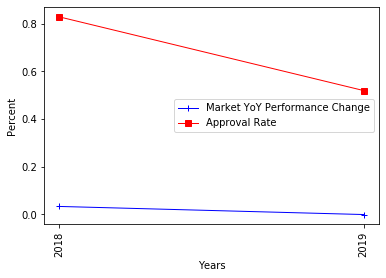

While there is direct correlation between market performance and approval rates there is not enough data to support market performance influences loans approval rates.


In [177]:
x_axis = np.arange(len(api_df))
tick_locations = [value for value in x_axis]

points_stock = api_df['Market Performance']
points_approval = api_df['Approval Rate']
stock = plt.plot(x_axis, points_stock, marker="+",color="blue", linewidth=1, label="Market YoY Performance Change")
approval= plt.plot(x_axis, points_approval, marker="s", color="Red", linewidth=1, label="Approval Rate")
plt.legend(loc="best")
plt.xticks(tick_locations,api_df["Year"], rotation="vertical")
plt.xlabel("Years")
plt.ylabel("Percent")
plt.show()
print("While there is direct correlation between market performance and approval rates there is not enough data to support market performance influences loans approval rates.")